<a href="https://colab.research.google.com/github/sandipanpaul21/Dimensionality-Reduction-in-Python/blob/master/12_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Principal Component Analysis (PCA)**
- It is where the *data from high dimensional space is reduced to lower dimensions*
- In simple words, we transform our features **into a lower number of artificial features** without losing much of the information. In this method, features are transformed into a set of ‘artificial features’. 
- These **‘artificial features’ are known as Principal Components**, where the first component contains most of the information that can be contained in a single ‘artificial feature’ and we are left to select the number of components in order to reduce the features. 

**NOTE:** Here the features are not explicitly dropped rather the variation is extracted saving the loss of data.

#### **Why use PCA in the first place?**

- Suppose we have a dataset having two variables and 10 number of data points. If we were asked to visualize the data points, we can do it very easily. The result is very interpretable as well.
- Now if we try to increase the number of variables it gets **almost impossible for us to imagine a dimension higher than three-dimensions** 
- This problem we face when analyzing higher-dimensional datasets is what commonly referred to as **“The curse of dimensionality”.**
- So we use PCA or **Principal Component Analysis**
  1. It reduces high dimensional data to lower dimensions while capturing maximum variability of the dataset.
  2. Data visualization is the most common application of PCA. 
  3. PCA is also used to make the training of an algorithm faster by reducing the number of dimensions of the data.

#### **Steps to Compute Principal Components from Scratch**
Import Dataframe
  1. Standardize each column
  2. Compute Covariance Matrix
  3. Compute Eigen values and Eigen Vectors
  4. Derive Principal Component Features by taking dot product of eigen vector and standardized columns
  5. PCA Dataframe

**Eigen Value**
- ‘Eigen’ is a German word that means ‘proper’ or ‘characteristic’. 
- Therefore, the term eigenvalue can be termed as characteristic value, characteristic root, proper values or latent roots as well. 
- In simple words, the eigenvalue is a scalar that is used to transform the eigenvector

                                  Basic Equation is Ax = λx

- The number or **scalar value “λ” is an eigenvalue of A.**
- In Mathematics, an eigen vector corresponds to the real **non zero eigenvalues which point in the direction stretched by the transformation** whereas eigen value is considered as a factor by which it is stretched.
- In case, **if the eigen value is negative, the direction of the transformation is negative.**
- Eigenvalues are coefficients applied to eigenvectors that give the vectors their length or magnitude. For example, a negative eigenvalue may reverse the direction of the eigenvector as part of scaling it.

**Eigen Vectors**
- Eigenvectors are the vectors(non-zero) that do not change the direction when any linear transformation is applied. 
- **Eigen Vector changes by only a scalar factor (also known as Eigen Value)** 


Let us say A is an “n × n” matrix and λ is an eigenvalue of matrix A, then x, a non-zero vector, is called as eigenvector if it satisfies the given below expression;

                           Basic Equation is Ax = λx where x is an eigenvector of A corresponding to eigenvalue, λ.



#### **Why use Eigenvalues & Eigenvectors**
- In simple words, the concept of Eigenvectors and Eigenvalues are used to determine a set of important variables (in form of vector) along with scale along different dimensions (key dimensions based on variance) for analysing the data in a better manner.

**Example 1 : Image of Human Being**
  1. When you look at the above picture (data) and identify it as human being
  2. What are some of the key information (dimensions / principal components) you use to call it out as human being? 
  3. Is it not body, face, legs etc information? These principal components / dimensions can be seen as eigenvector with each one of them having their own elements. 
  4. For example, body will have elements such as color, built, shape etc. 
  5. Face will have elements such as nose, eyes, color etc. 
  6. The overall data (image) can be seen as transformation matrix. 
  7. The data (transformatio matrix) when acted on the eigenvectors (principal components) will result in the eigenvectors multiplied by scale factor (eigenvalue). 
  8. And accordingly, identify the image as the tiger.

**Example 2: Predicting the stock prices** 
  1. Here the dependent value is stock price and there are a large number of independent variables on which the stock price depends. 
  2. Using large number of independent variables (also called features), training one or more machine learning models for predicting the stock price will be computationally intensive. 
  3. Such models turn out to be complex models. 

Can we use the information stored in these variables and **extract a smaller set of variables (features) to train the models** and do the prediction while ensuring that most of the information contained in the original variables is retained / maintained. 

This will result in simpler and computationally efficient models. **This is where eigenvalues and eigenvectors comes into picture.**



In [ ]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# Let's take an Example
X = np.array([1,2,3,4,5])
Y = np.array([123,142,163,174,195])
Z = np.array([531,522,573,514,595])
data = pd.DataFrame({'X':X, 'Y':Y, 'Z':Z})
print("Shape of Data:", data.shape)
print(data)

# Manual Steps
print("\nStep 1. Calculate Mean of Each Column")
Mean_X = data["X"].mean()
print("Mean of X :",Mean_X)
Mean_Y = data["Y"].mean()
print("Mean of Y :",Mean_Y)
Mean_Z = data["Z"].mean()
print("Mean of Z :",Mean_Z)

print("\nStep 2. Calculate Variance")
# Variance = sum(((x(i) - mean(x))^2))/n-1
# Var(X) = [ (1–3.0)^2 + (2–3.0)^2 + (3-3.0)^2 + (4-3.0)^2 +(5-3.0)^2 ] / (5-1) = (4.0 + 1.0 + 0.0 + 1.0 + 4.0) / 4 = 10.0 / 4 = 2.5
print(data.var())

print("\nStep 3. Covariance Matrix :",data.cov().shape)
# Covariance (XY) = (sum|X(i)-mean(X) * Y(i)-mean(Y)|) / (n-1)
# Covar(XY) = [(1–3.0)*(123-159.4) + (2–3.0)*(142-159.4) + (3-3.0)*(163-159.4) + (4-3.0)*(174-159.4) + (5-3.0)*(195-159.4)] / (5-1) 
# = [2.0*36.4 + 1.0*17.4 + 0.0 + 1.0*14.5 + 2.0*35.5] / 4 
# = 175.7 / 4 = 43.92 ~ 44
# Covar(XY) = 44
# If you examine the calculations carefully, you’ll see the pattern to compute the covariance of the XZ and YZ columns. 
# And you’ll see that Covar(XY) = Covar(YX).
print(data.cov())

print("\nStep 4. Eigenvalues and Eigenvectors for the calculated Covariance matrix.")
#Calculating Eigenvalues and Eigenvectors of the covariance matrix
eigen_values , eigen_vectors = np.linalg.eigh(data.cov())
print("Eigen Values of Covariance Matrix :",eigen_values)
print("Eigen Vectors of Covariance Matrix :")
print(eigen_vectors)

print("\nStep 5. Sort Eigenvalues in descending order")
# Sort the Eigenvalues in the descending order along with their corresponding Eigenvector.
# Remember each column in the Eigen vector-matrix corresponds to a principal component,
# So arranging them in descending order of their Eigenvalue 
# will automatically arrange the principal component in descending order of their variability.
# Hence the first column in our rearranged Eigen vector-matrix will be a principal component that captures the highest variability.

#sort the eigenvalues in descending order
sorted_index = np.argsort(eigen_values)[::-1]
print("Sorting Index based on Eigen Value :",sorted_index)
sorted_eigenvalue = eigen_values[sorted_index]
print("Sorting Eigen Value :",sorted_eigenvalue)
#similarly sort the eigenvectors 
sorted_eigenvectors = eigen_vectors[:,sorted_index]
print("Sorted Eigen Vectors :")
print(sorted_eigenvectors)

print("\nStep 6. Select a subset from the rearranged Eigenvalue matrix")
# Select a subset from the rearranged Eigenvalue matrix as per our need i.e. number_comp = 2. 
# This means we selected the first two principal components.
# select the first n eigenvectors, n is desired dimension of our final reduced data.
n_components = 2 #you can select any number of components.
print("Number of Principal Components :",n_components)
eigenvector_subset = sorted_eigenvectors[:,0:n_components]
print("Filter Eigen Vector Subset :")
print(eigenvector_subset)
# n_components = 2 means our final data should be reduced to just 2 variables. 
# if we change it to 3 then we get our data reduced to 3 variables.

print("\nStep 7. Transform the data : Mean Centering the data  ")
# Finally, transform the data by having a dot product between the Transpose of the Eigenvector subset 
# and the Transpose of the mean-centered data. 
# By transposing the outcome of the dot product, 
# the result we get is the data reduced to lower dimensions from higher dimensions.

X_mean = data - data.mean()
print("i. Input Data :")
print(data)
print("\nii. Mean of Each Column")
print(data.mean())
print("\niii. Mean(Data) = Mean(column) - Column_Value")
print(X_mean)
print("In above dataframe, I’ve subtracted the mean of each column from each cell of respective column itself.")
print("So the mean of each column now is zero.")

# Compute PC1 for row 1. 
#Transform the data 
X_reduced = np.dot(eigenvector_subset.transpose(),X_mean.transpose()).transpose()
print("\n")
print("PCA of Data = Dot Product of Mean(Data) and Eigen Vector Subset")
print(X_reduced)
print("\nThe final dimensions of Data reduced to (5,2) and originally the data was of higher dimensions (5,3)")

Shape of Data: (5, 3)
   X    Y    Z
0  1  123  531
1  2  142  522
2  3  163  573
3  4  174  514
4  5  195  595

Step 1. Calculate Mean of Each Column
Mean of X : 3.0
Mean of Y : 159.4
Mean of Z : 547.0

Step 2. Calculate Variance
X       2.5
Y     780.3
Z    1237.5
dtype: float64

Step 3. Covariance Matrix : (3, 3)
      X      Y       Z
X   2.5   44.0    30.0
Y  44.0  780.3   584.5
Z  30.0  584.5  1237.5

Step 4. Eigenvalues and Eigenvectors for the calculated Covariance matrix.
Eigen Values of Covariance Matrix : [7.92511994e-03 3.82275407e+02 1.63801667e+03]
Eigen Vectors of Covariance Matrix :
[[ 0.99824773  0.05082148  0.03030913]
 [-0.05905775  0.82370297  0.56393759]
 [ 0.00369442 -0.56473941  0.82526102]]

Step 5. Sort Eigenvalues in descending order
Sorting Index based on Eigen Value : [2 1 0]
Sorting Eigen Value : [1.63801667e+03 3.82275407e+02 7.92511994e-03]
Sorted Eigen Vectors :
[[ 0.03030913  0.05082148  0.99824773]
 [ 0.56393759  0.82370297 -0.05905775]
 [ 0.82526102 -

In [ ]:
# PCA in Python Code
# I initialize the PCA() class and call the fit_transform() on Data to simultaneously compute the weights of the Principal components 
# then transform X to produce the new set of Principal components of Data. 
# This I am storing in the df_pca object, which is converted to a pandas DataFrame.

pca = PCA(n_components=2)
df_pca = pca.fit_transform(X=data)

# Store as dataframe and print
df_pca = pd.DataFrame(df_pca)
print("Original Data Shape :",data.shape)
print(data)
print("\n")
print("PCA Data Shape :",df_pca.shape)
print(df_pca.round(2))
# The first column is the first PC and so on. This dataframe (df_pca) has the same dimensions as the original data X.

# Principal Components Weights (Eigenvectors)
print("\n")
print("Eigen Vectors :")
print(pca.components_)

Original Data Shape : (5, 3)
   X    Y    Z
0  1  123  531
1  2  142  522
2  3  163  573
3  4  174  514
4  5  195  595


PCA Data Shape : (5, 2)
       0      1
0 -33.79 -21.05
1 -30.47  -0.26
2  23.49 -11.72
3 -18.97  30.71
4  59.75   2.32


Eigen Vectors :
[[ 0.03030913  0.56393759  0.82526102]
 [ 0.05082148  0.82370297 -0.56473941]]


In [ ]:
# How many components to take ?
pca = PCA()
df_pca = pca.fit_transform(X=data)
# Ratio of Variance explained by each component
# We can now look at the proportion of variance explained by each PC.
var = pca.explained_variance_ratio_
print(var)
print("So variance explained by each component are 0.81, 0.18, 0.000003")

# Inference : 
# From the output we find that PC1 explains 81% of the variance, 
# PC2 explains 18% and so on. 
# We find that the first 2 components explain approximately 90% of the variance 
# (0.81+0.18+0.000003)

[8.10778928e-01 1.89217150e-01 3.92274411e-06]
So variance explained by each component are 0.81, 0.18, 0.000003


Text(0, 0.5, 'Cumulative Proportion of Variance Explained')

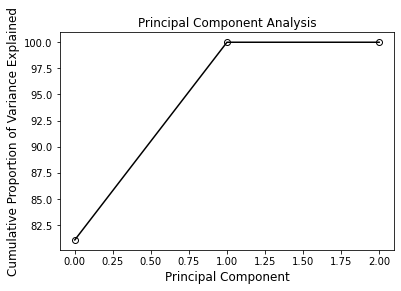

In [ ]:
# PCA CHART

# In the above step, we got the proportion of variance explained by each component 
# which we need to decide the number of components. 
# We calculated that the first seven components explain most of the variance, 
# however, we plot the explained variance on a line graph. 
# Here we plot the ratio of variance explained by each component using a line graph. 
# This PCA chart helps us to decide the number of principal components to be taken for the modeling algorithm.

cumulative_var = np.cumsum(np.round(var, decimals=4)*100)
plt.plot(cumulative_var,'k-o',markerfacecolor='None',markeredgecolor='k')
plt.title('Principal Component Analysis',fontsize=12)
plt.xlabel("Principal Component",fontsize=12)
plt.ylabel("Cumulative Proportion of Variance Explained",fontsize=12)

In [ ]:
# How to get the original features back
# The fitted pca object has the inverse_transform() method that gives back the original data when you input principal components features.
print("PCA Dataframe")
print(df_pca.round(2))
df_orig = pca.inverse_transform(df_pca)
print("\n")
print("Original Dataframe :")
print(pd.DataFrame(df_orig).round())

PCA Dataframe
[[-3.379e+01 -2.105e+01 -9.000e-02]
 [-3.047e+01 -2.600e-01  6.000e-02]
 [ 2.349e+01 -1.172e+01  1.200e-01]
 [-1.897e+01  3.071e+01 -1.000e-02]
 [ 5.975e+01  2.320e+00 -7.000e-02]]


Original Dataframe :
     0      1      2
0  1.0  123.0  531.0
1  2.0  142.0  522.0
2  3.0  163.0  573.0
3  4.0  174.0  514.0
4  5.0  195.0  595.0


In [ ]:
# Let's Take another example
# Load the Datasets 

# Boston Dataset
boston = datasets.load_boston()
boston_pd = pd.DataFrame(boston.data)
boston_pd.columns = boston.feature_names
boston_pd["MEDV"] = boston.target
boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
# Removing Response  variable

# As PCA works in an unsupervised learning setup, 
# therefore we will remove the dependent i.e. response variable from our dataset. 
# Note that PCA only works on numeric variables, 
# and that is why we create dummy variables for categorical variables. 
# As here we have only one categorical variable ‘Chas’ which is a binary categorical variable, 
# we don’t require creating dummy variable and can use all the independent variables for performing PCA.

BosData2 = boston_pd[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
                    'TAX','PTRATIO', 'B', 'LSTAT']]
BosData2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
# Scaling Features

# We will have to first scale the dataset to perform PCA in Python.
scale = StandardScaler()
scaled_data = scale.fit_transform(BosData2)
scaled_data

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [ ]:
# We can change the above output into a dataset.

scaled_data = pd.DataFrame(scaled_data,columns=BosData2.columns)
scaled_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [ ]:
# Splitting the dataset into train and test

# PCA should not be made to run on the entire dataset 
# As this would cause the dataset to leak thus causing overfitting
# Also, we should not perform PCA on train and test separately 
# as the level of variance will be different in both these datasets 
# which will the cause the final vectors of these two datasets to have different directions
# We first divide the dataset into train and test and perform PCA on train dataset 
# and transform the test dataset using that PCA model (which was fitted on the train dataset). 

# Target Variable
Y = boston_pd['MEDV']
X_train,X_test,Y_train,Y_test=train_test_split(scaled_data,Y,test_size=0.3,random_state=123) 

# Initialize and Fit PCA
# We first initialize PCA for having 13 components (for 13 continuous variables in the dataset) 
# and then we fit this model on the scaled features.

pca = PCA(n_components=13)
pca_model = pca.fit(X_train)
print(pca_model)

PCA(copy=True, iterated_power='auto', n_components=13, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


In [ ]:
# Generate PCA Loadings

# We use transform command which transforms the scaled data to PCA loadings for each observation.
pca_train = pca_model.transform(X_train)
pca_train

array([[-2.20660682, -1.55051779,  1.69405915, ...,  0.41926072,
         0.12959831,  0.00521784],
       [-2.89522044,  0.63233154, -0.11783641, ..., -0.16824372,
         0.27292552,  0.19829253],
       [-1.32856526, -0.86934574, -0.67716436, ...,  0.45628438,
        -0.26832397,  0.13759222],
       ...,
       [-1.14293586,  0.00729923, -1.03490865, ..., -0.12767168,
         0.17449274,  0.07324418],
       [ 3.67339539,  0.22908568, -0.4579643 , ...,  0.33265531,
        -0.09832891,  0.12570271],
       [ 3.34152955,  0.53789073, -1.73620654, ..., -0.91230342,
        -0.58960347,  0.28672463]])

In [ ]:
# Generate Loading Matrix

# We now generate the principal components loading matrix 
# by using the attribute components_ of the pca command for each variable.

Variable_Names =['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat'] 
Matrix = pd.DataFrame(pca_model.components_,columns=Variable_Names)
Matrix1 = np.transpose(Matrix)
Matrix1

# Inference :
# This Loading Matrix is like a correlation matrix. 
# The variable having the highest correlation with the columns will be the first principal component
#  For eg, the variable indus has the highest correlation with PC1, therefore, indus will be PC 1 
#  Heading in the output should be PC1, PC2 and so on. Will be renaming them in the upcoming steps

,0,1,2,3,4,5,6,7,8,9,10,11,12
crim,0.261028,0.402021,0.272849,0.083141,-0.056245,0.649569,0.433235,0.057887,0.215429,0.063131,-0.128398,0.064637,-0.040974
zn,-0.248594,0.378921,0.236975,0.288462,0.135785,0.023437,-0.443978,-0.463129,0.217877,0.354617,0.201162,-0.086564,0.058977
indus,0.344874,-0.105353,-0.039082,0.016200,0.008651,-0.099526,-0.308914,0.097501,0.734052,-0.271809,-0.226253,-0.045638,0.295420
chas,-0.004040,-0.306065,0.234459,0.740967,-0.490540,-0.166000,0.174522,0.017959,0.020874,-0.013390,0.009374,-0.031098,-0.040853
nox,0.340383,-0.191293,0.153285,0.059000,0.137624,0.007177,-0.244216,0.085684,-0.095101,0.281641,0.052457,0.798674,-0.074809
rm,-0.199428,-0.158725,0.640229,-0.421555,-0.181577,-0.063845,0.073905,-0.289464,0.115754,-0.383456,0.168155,0.174593,-0.044029
age,0.317344,-0.336219,0.057659,-0.063865,0.072904,0.098528,0.008672,-0.608906,-0.224804,0.154259,-0.522464,-0.211679,0.029531
dis,-0.320117,0.385590,-0.109335,0.173370,-0.051794,-0.110102,-0.067926,-0.104640,-0.137332,-0.381458,-0.596248,0.395582,0.009908
rad,0.306986,0.286627,0.257125,-0.048092,-0.234509,-0.073091,-0.206277,0.156843,-0.465397,-0.069271,0.068748,-0.124110,0.621425
tax,0.337749,0.234736,0.160595,-0.037207,-0.150966,-0.101342,-0.378124,0.140673,-0.110272,-0.148007,-0.072336,-0.242639,-0.713897


In [ ]:
# Variance explained by each Principal Component

# We took the number of components for PCA equal to the number of variables in our dataset 
# which is 13 in our case 
# we will figure out the optimum value of the number of components to run PCA 
# i.e. reduce the number of components to be considered for the modeling algorithms 
# thus in a way reducing the number of features
# In order to decide the number of Principal Components, 
# we analyze the proportion of variance explained by each component
# We use the explained_variance function for computing variance explained by each Principal Component.

pca_model.explained_variance_

array([6.15535877, 1.3837924 , 1.17884792, 0.82071583, 0.7800156 ,
       0.66886856, 0.56912498, 0.38614551, 0.27744284, 0.22153714,
       0.19341501, 0.15764127, 0.0663099 ])

In [ ]:
# Ratio of Variance explained by each component

# We can now look at the proportion of variance explained by each PC.
var = pca_model.explained_variance_ratio_
var

# Inference : 
# From the output we find that PC1 explains 47% of the variance, 
# PC2 explains 11% and so on. 
# We find that the first seven components explain approximately 90% of the variance 
# (0.478 + 0.107 + 0.091 + 0.063 + 0.060 + 0.052 + 0.044 = 0.898)

array([0.47867295, 0.10761095, 0.09167339, 0.06382316, 0.0606581 ,
       0.05201472, 0.04425814, 0.0300287 , 0.02157541, 0.01722789,
       0.01504097, 0.01225901, 0.00515661])

Text(0, 0.5, 'Cumulative Proportion of Variance Explained')

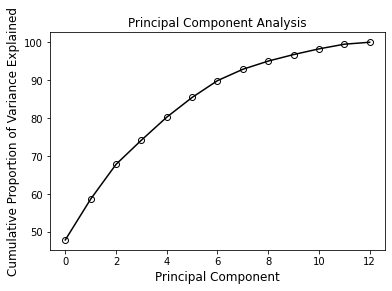

In [ ]:
# PCA CHART

# In the above step, we got the proportion of variance explained by each component 
# which we need to decide the number of components. 
# We calculated that the first seven components explain most of the variance, 
# however, we plot the explained variance on a line graph. 
# Here we plot the ratio of variance explained by each component using a line graph. 
# This PCA chart helps us to decide the number of principal components to be taken for the modeling algorithm.

cumulative_var = np.cumsum(np.round(var, decimals=4)*100)
plt.plot(cumulative_var,'k-o',markerfacecolor='None',markeredgecolor='k')
plt.title('Principal Component Analysis',fontsize=12)
plt.xlabel("Principal Component",fontsize=12)
plt.ylabel("Cumulative Proportion of Variance Explained",fontsize=12)


In [ ]:
# Renaming Columns

# We will rename the columns of the loading matrix that was generated for each observation using PCA. 
# After renaming, we will select 7 principal components 
# and make a data frame with the dependent variable and the 7 PCs.

pca_train = pd.DataFrame(pca_train,columns=['PC_' + str(i) for i in range(1, 14)])
pca_train.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13
0,-2.206607,-1.550518,1.694059,1.829224,-2.345380,-0.699030,1.130661,-0.469812,0.581400,-0.291183,0.419261,0.129598,0.005218
1,-2.895220,0.632332,-0.117836,0.029440,0.111146,0.039596,0.070625,0.811305,0.094068,-0.318388,-0.168244,0.272926,0.198293
2,-1.328565,-0.869346,-0.677164,-0.369238,0.301381,0.432975,0.884145,0.255710,-0.509150,0.629288,0.456284,-0.268324,0.137592
3,2.894334,0.058086,0.311875,-0.535148,-0.709886,-0.038247,-1.237339,-0.022792,-0.471815,-0.210664,0.106260,0.289861,0.100084
4,3.388655,0.337146,0.722763,-0.542509,-0.758414,0.939876,-0.556901,-0.403837,-0.204815,-0.488596,0.338563,-0.027698,0.055221


In [ ]:
# Concatenate Dependent variable and Principal Components

# We now concatenate the dependent variable i.e. "MEDV" with principal components and 
# Suppose take the first seven components for our analysis. 
# First, we will reset the index for Y_train as we need to concatenate datasets to make one whole train dataset. 
# Then we will remove the index variable from the dataset 
# and make a subset of the dataset having 7 PCs and the dependent variable.

Y_train1 = Y_train.reset_index()
 
pca_train1 = pd.concat([pca_train,Y_train1],axis=1)
pca_train2 = pca_train1.drop(columns='index')
pca_train3 = pca_train1[['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5', 'PC_6', 'PC_7','MEDV']]
pca_train3.head()

# After this step, run any alogirthim as per your choice !!

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,MEDV
0,-2.206607,-1.550518,1.694059,1.829224,-2.345380,-0.699030,1.130661,35.2
1,-2.895220,0.632332,-0.117836,0.029440,0.111146,0.039596,0.070625,25.0
2,-1.328565,-0.869346,-0.677164,-0.369238,0.301381,0.432975,0.884145,36.2
3,2.894334,0.058086,0.311875,-0.535148,-0.709886,-0.038247,-1.237339,16.1
4,3.388655,0.337146,0.722763,-0.542509,-0.758414,0.939876,-0.556901,10.9
